In [1]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)
library(igraph)
library(BiocParallel)
library(SingleCellExperiment)
library(Matrix)
library(dplyr)
#library(MouseGastrulationData)

Loading required package: edgeR

Loading required package: limma

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedi

In [2]:
load('/home/jovyan/scripts/renal_covid_19/scripts_for_publication/trend_of_cell_with_steroid/steroid_pos_only.RData')

In [3]:
steroid_pos_only_no_knnx

class: SingleCellExperiment 
dim: 1215 12802 
metadata(17): 5_subcluster_colors 9_subcluster ... pca umap
assays(1): X
rownames(1215): HES4 ISG15 ... MT-ND6 MT-CYB
rowData names(11): mt n_cells_by_counts ... mean std
colnames(12802): UK-CIC10690315+UK-CIC10690507_AAATGCCAGGCACATG-1
  UK-CIC10690315+UK-CIC10690507_AACTCTTCACTATCTT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTGCGTCAGTGGTAAT-1
  UK-CIC10690384+UK-CIC10690576_TTTCCTCCACCAGCAC-1
colData names(48): annotation22_ES centre ... steroid_severity
  steroid_timeline_new
reducedDimNames(3): PCA X_pca_harmony_orig.ident UMAP
mainExpName: NULL
altExpNames(0):

In [4]:
unique(steroid_pos_only_no_knnx$case_control)

[1] POSITIVE
Levels: POSITIVE

In [5]:
unique(steroid_pos_only_no_knnx$patient_id)

[1] C138 C101 C145 C147 C146 C33 
Levels: C101 C138 C145 C146 C147 C33

In [6]:
data_milo <-Milo(steroid_pos_only_no_knnx)

In [7]:
data_milo <- buildGraph(data_milo, k = 30, d = 30, reduced.dim = "X_pca_harmony_orig.ident") 

Constructing kNN graph with k:30



In [8]:
data_milo <- makeNhoods(data_milo, prop = 0.1, k = 30, d=30, refined = TRUE, reduced_dims = "X_pca_harmony_orig.ident")

Checking valid object



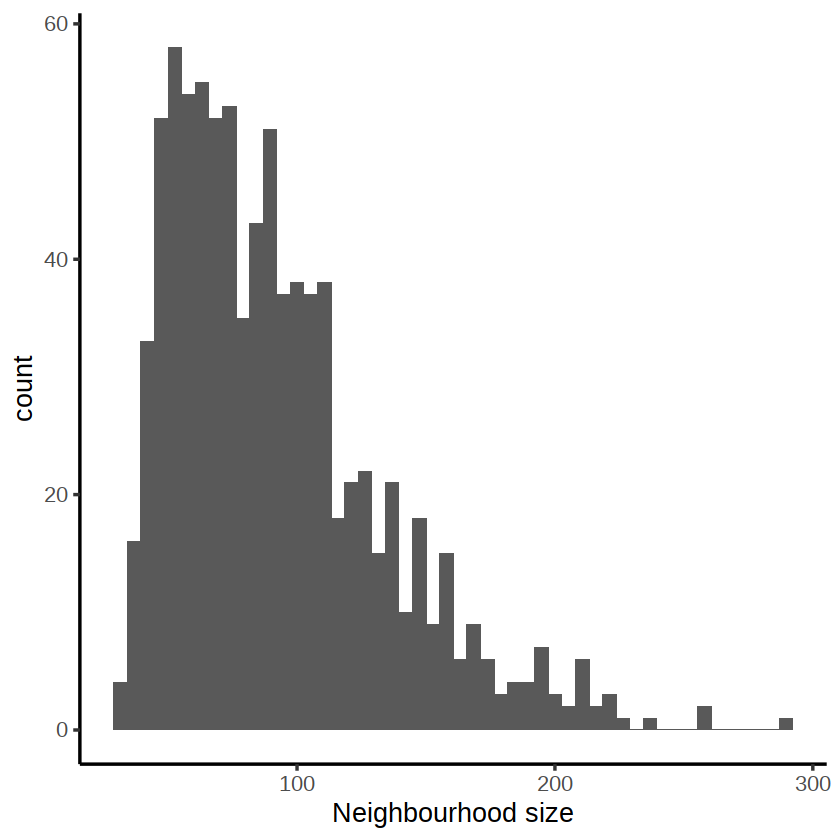

In [9]:
plotNhoodSizeHist(data_milo)

In [10]:
length(unique(rownames(data_milo)))

[1] 1215

In [11]:
data_milo <- countCells(data_milo, meta.data = as.data.frame(colData(data_milo)), sample="sample_id")

Checking meta.data validity

Counting cells in neighbourhoods



In [12]:
head(nhoodCounts(data_milo))

  [[ suppressing 31 column names ‘C101_060121’, ‘C101_110121’, ‘C101_130121’ ... ]]



6 x 31 sparse Matrix of class "dgCMatrix"
                                                                        
1 . . 14 . 3 15 . .  1  . . . . . 2 . 1 . . . . 13 . .  1  3 10 . . .  1
2 . 2 18 8 3 31 1 .  .  . 6 . . 8 6 . . . . . 3 24 . . 18 16 14 . . 7 31
3 1 6  . . .  . . 4 13  5 . . . . . . . 4 2 4 .  2 1 .  .  .  1 5 2 3  2
4 . 2 28 1 9  7 . .  .  . . . . . . . 3 . . . . 11 1 .  1  1  9 . . .  .
5 . 3  . . .  1 . 8 42 12 9 . . . . . . 2 . 2 .  . . .  1  .  2 3 3 1  5
6 . .  . . 1 19 2 . 11  . 1 . . 2 . 1 . . . 1 1  . 2 1  1 23 20 . . .  6

In [13]:
data_design <- data.frame(colData(data_milo))[,c("sample_id", "steroid_timeline_new",'time_from_infection')]


In [14]:
head(data_design)

,sample_id,steroid_timeline_new,time_from_infection
,<fct>,<chr>,<dbl>
UK-CIC10690315+UK-CIC10690507_AAATGCCAGGCACATG-1,C138_040221,groupB_after_steroid_pos,19
UK-CIC10690315+UK-CIC10690507_AACTCTTCACTATCTT-1,C138_040221,groupB_after_steroid_pos,19
UK-CIC10690315+UK-CIC10690507_ACGAGCCCAAAGTCAA-1,C138_040221,groupB_after_steroid_pos,19
UK-CIC10690315+UK-CIC10690507_ACTTTCAGTCTGATTG-1,C138_040221,groupB_after_steroid_pos,19
UK-CIC10690315+UK-CIC10690507_AGATTGCTCAATCTCT-1,C101_060121,groupA_before_steroid_pos,4
UK-CIC10690315+UK-CIC10690507_AGCATACGTGTAATGA-1,C138_040221,groupB_after_steroid_pos,19


In [15]:
dim(data_design)

[1] 12802     3

In [16]:
data_design <- distinct(data_design)
dim(data_design)

[1] 31  3

In [17]:
head(data_design)

,sample_id,steroid_timeline_new,time_from_infection
,<fct>,<chr>,<dbl>
UK-CIC10690315+UK-CIC10690507_AAATGCCAGGCACATG-1,C138_040221,groupB_after_steroid_pos,19
UK-CIC10690315+UK-CIC10690507_AGATTGCTCAATCTCT-1,C101_060121,groupA_before_steroid_pos,4
UK-CIC10690317+UK-CIC10690509_AAACCTGGTACACCGC-1,C138_020221,groupB_after_steroid_pos,17
UK-CIC10690321+UK-CIC10690513_AACTGGTTCAACACGT-1,C138_300121,groupB_after_steroid_pos,14
UK-CIC10690321+UK-CIC10690513_AGAGTGGCATCCGTGG-1,C145_230121,groupB_after_steroid_pos,18
UK-CIC10690325+UK-CIC10690517_AAATGCCAGTGCCAGA-1,C145_190121,groupB_after_steroid_pos,14


In [18]:
rownames(data_design) <- data_design$sample_id

In [19]:
data_milo <- calcNhoodDistance(data_milo, d=30, reduced.dim = "X_pca_harmony_orig.ident")

as(<dgTMatrix>, "dgCMatrix") is deprecated since Matrix 1.5-0; do as(., "CsparseMatrix") instead



In [20]:
da_results <- testNhoods(data_milo, design = ~time_from_infection+steroid_timeline_new, design.df = data_design, reduced.dim="X_pca_harmony_orig.ident")
head(da_results)

Warning message in testNhoods(data_milo, design = ~time_from_infection + steroid_timeline_new, :
“Sample names in design matrix and nhood counts are not matched. Reordering”
Using TMM normalisation

Performing spatial FDR correction withk-distance weighting



,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6850588,10.84176,0.389333,0.5326561011,0.643502133,1,0.643219576
2,1.4434632,11.95032,1.262866,0.2611203797,0.367865030,2,0.367239815
3,-3.0714445,11.41375,10.206451,0.0014012949,0.013985230,3,0.014448275
4,1.4267050,10.95880,1.374889,0.2409852575,0.346266192,4,0.346065797
5,-3.6483546,11.77897,13.809963,0.0002027157,0.004737418,5,0.004833543
6,-1.1134077,11.13869,1.178338,0.2777053978,0.383730302,6,0.383409363


In [21]:
da_results %>%
  arrange(SpatialFDR) %>%
  head()

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
323,-6.097601,11.13976,33.31705,7.924855e-09,6.855000e-06,323,7.009791e-06
554,-6.633460,11.76763,31.05359,2.536704e-08,1.097125e-05,554,1.115590e-05
225,-5.337977,11.28105,29.16613,6.705544e-08,1.933432e-05,225,2.059062e-05
453,-5.410118,12.00553,27.41100,1.658653e-07,3.586836e-05,453,3.684848e-05
324,-5.419333,11.41534,25.29472,4.955674e-07,8.573316e-05,324,9.013465e-05
231,-4.176334,11.69383,23.83690,1.055203e-06,1.521251e-04,231,1.566750e-04


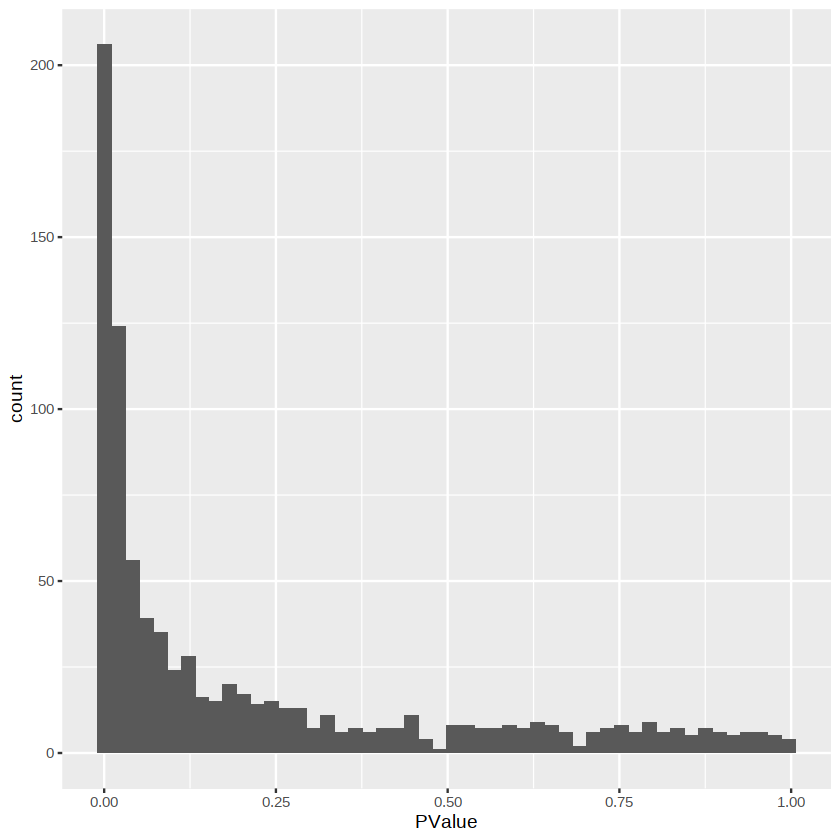

In [22]:
ggplot(da_results, aes(PValue)) + geom_histogram(bins=50)

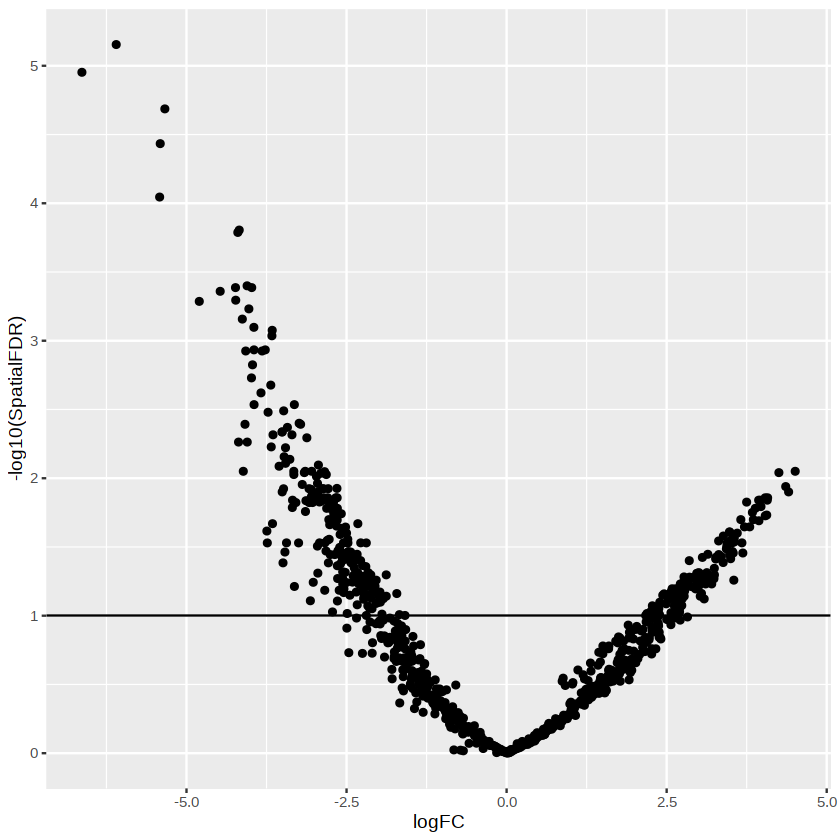

In [23]:
ggplot(da_results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) ## Mark significance threshold (10% FDR)

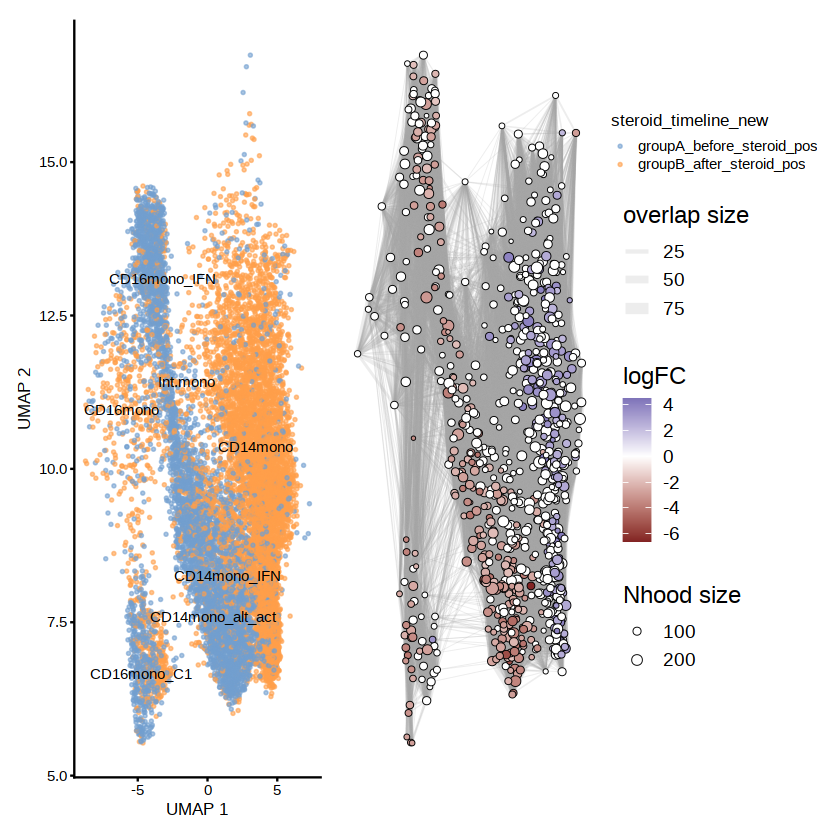

In [24]:
data_milo <- buildNhoodGraph(data_milo)

## Plot single-cell UMAP
umap_pl <- plotReducedDim(data_milo, dimred = "UMAP", colour_by="steroid_timeline_new", text_by = "annot4", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none")

## Plot neighbourhood graph
nh_graph_pl <- plotNhoodGraphDA(data_milo, da_results, layout="UMAP",alpha=0.1) 
  
umap_pl + nh_graph_pl +
  plot_layout(guides="collect")

In [25]:
unique(data_milo$annot4)

[1] "CD14mono_alt_act" "CD16mono"         "CD14mono"         "CD14mono_IFN"    
[5] "CD16mono_IFN"     "CD16mono_C1"      "Int.mono"

In [26]:
da_results <- annotateNhoods(data_milo, da_results, coldata_col = "annot4")
unique(da_results$annot4)

Converting annot4 to factor...



[1] "CD14mono"         "CD14mono_IFN"     "CD16mono_C1"      "CD16mono_IFN"    
[5] "CD14mono_alt_act" "CD16mono"         "Int.mono"

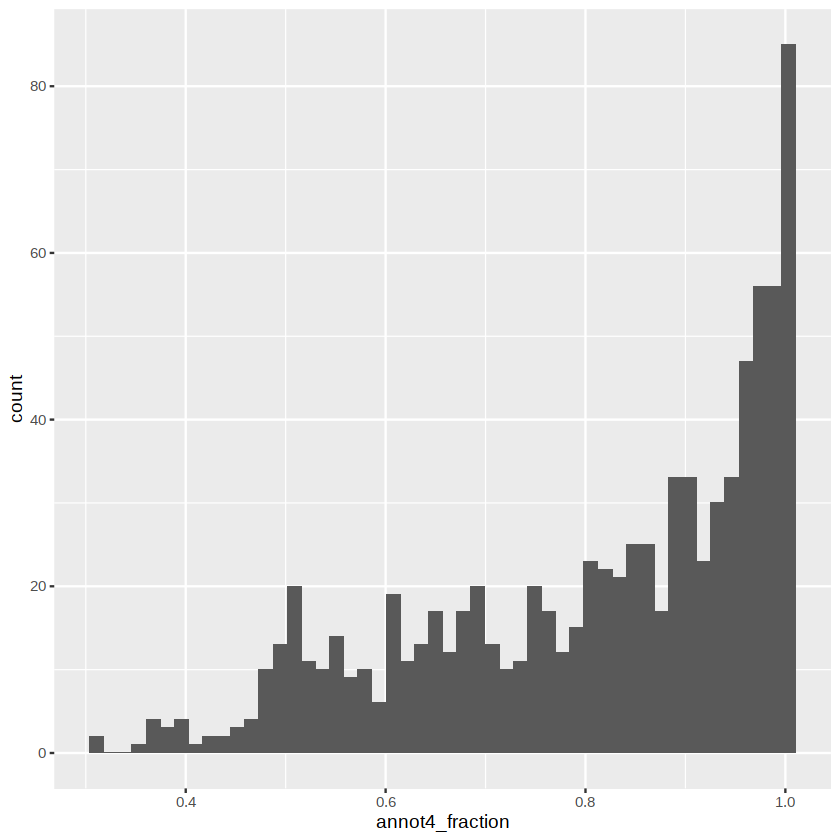

In [27]:
ggplot(da_results, aes(annot4_fraction)) + geom_histogram(bins=50)

In [28]:
dim(da_results)

[1] 865   9

In [29]:
da_results$annot4 <- ifelse(da_results$annot4_fraction < 0.7, "Mixed", da_results$annot4)

Converting group.by to factor...



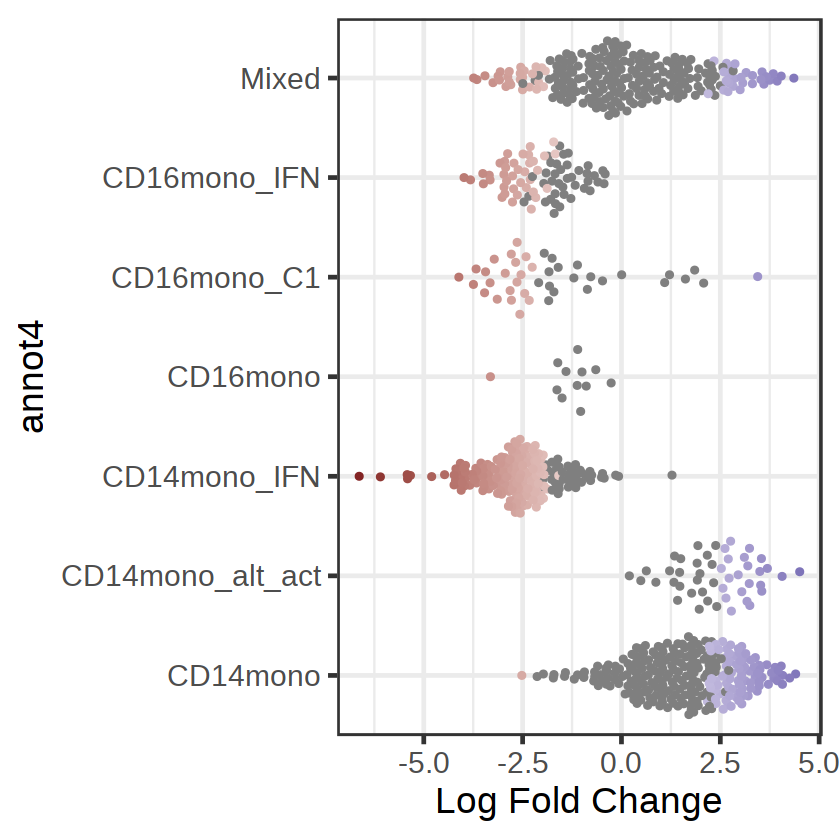

In [30]:
p <-plotDAbeeswarm(da_results, group.by = "annot4")
p

In [31]:
da_results1 <- da_results %>% filter(annot4 != 'Mixed')

Converting group.by to factor...



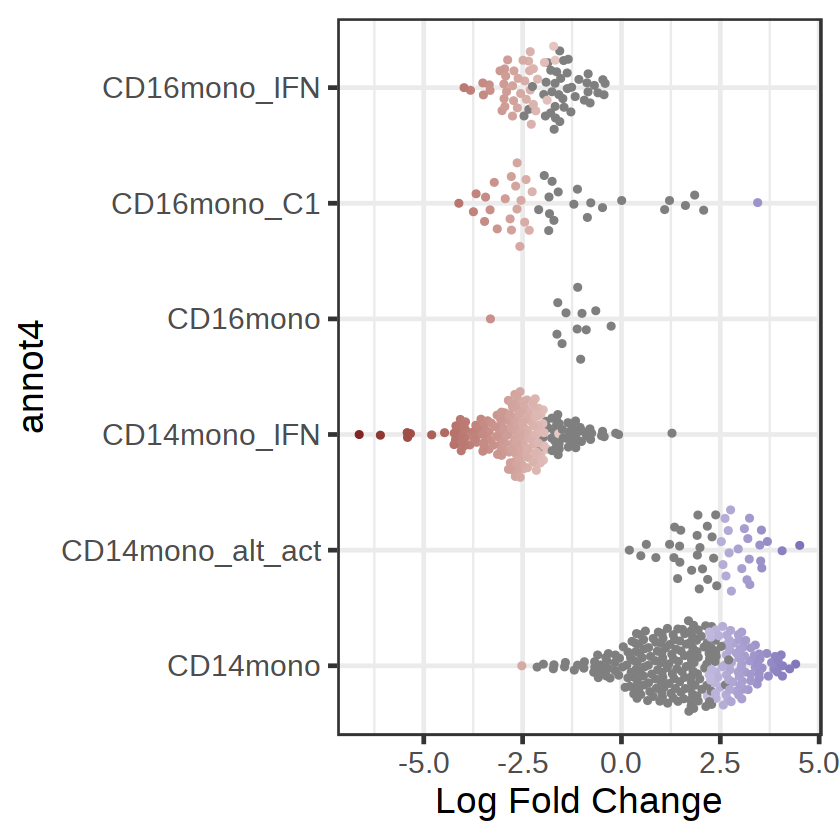

In [32]:
p <-plotDAbeeswarm(da_results1, group.by = "annot4")
p

In [33]:
pdf("/home/jovyan/scripts/renal_covid_19/scripts_for_publication/trend_of_cell_with_steroid/milo_mono_time_from_inf_steroid_pos.pdf",width=6, height=8)
plot(p)
dev.off()

png 
  2

In [ ]:
#saveRDS(data_milo, file = "/home/jovyan/scripts/renal_covid_19/steroid_pipeline/steroid_pos_only_milo.rds")

In [ ]:
#write.csv(da_results,"/home/jovyan/scripts/renal_covid_19/steroid_pipeline/steroid_pos_only_milo.csv", row.names = FALSE)
